In [36]:
import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [37]:
# train 파일 load

csv_path = r"C:\Users\ryang\OneDrive\바탕 화면\대학원\과제\1-1 과제\머신러닝\train.csv"

train_data = pd.read_csv(csv_path)
print(train_data.shape)
train_data.head()


(32950, 21)


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,19495,36,technician,married,university.degree,no,yes,yes,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
1,38793,28,admin.,single,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5,no
2,27160,57,management,divorced,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
3,36476,24,blue-collar,single,basic.9y,no,unknown,unknown,cellular,jun,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,no
4,38007,24,student,single,basic.9y,no,unknown,unknown,cellular,sep,...,1,999,0,nonexistent,-3.4,92.379,-29.8,0.788,5017.5,yes


In [38]:
# test 파일 load

csv_path = r"C:\Users\ryang\OneDrive\바탕 화면\대학원\과제\1-1 과제\머신러닝\test.csv"

test_data = pd.read_csv(csv_path)
print(test_data.shape)
test_data.head()

(8238, 20)


,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,8626,27,technician,single,university.degree,no,no,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
1,6749,29,services,married,basic.9y,no,yes,no,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,7227,59,admin.,married,high.school,no,yes,no,telephone,may,thu,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
3,12558,52,entrepreneur,married,university.degree,no,yes,no,cellular,jul,mon,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
4,9628,40,technician,married,professional.course,no,no,no,telephone,jun,mon,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1


In [39]:
# 원본 파일 유지를 위해 train data 깊은 복사
df = train_data.copy()

print('type(df):', type(df))

type(df): <class 'pandas.core.frame.DataFrame'>


In [40]:
df.describe()

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,20572.367527,40.010561,2.569347,962.383338,0.172049,0.081873,93.574727,-40.502194,3.623780,5167.204701
std,11887.028106,10.415313,2.774591,187.141359,0.492613,1.572049,0.579442,4.631271,1.732958,72.041184
min,1.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10272.250000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20587.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30854.750000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [41]:
#결측치 확인. 있으면 true = 1. 없으면 0
print(df.isna().sum())

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [42]:
#각 컬럼별 unknown 갯수 확인
unknown_counts = {}

for col in df.columns:
    cnt = (df[col].astype(str).str.lower() == 'unknown').sum()
    unknown_counts[col] = cnt

import pandas as pd
pd.DataFrame.from_dict(unknown_counts, orient='index', columns=['unknown_count'])

,unknown_count
id,0
age,0
job,262
marital,62
education,1371
default,6859
housing,790
loan,790
contact,0
month,0


In [43]:
df.mode().iloc[0]


id                                1
age                            31.0
job                          admin.
marital                     married
education         university.degree
default                          no
housing                         yes
loan                             no
contact                    cellular
month                           may
day_of_week                     thu
campaign                        1.0
pdays                         999.0
previous                        0.0
poutcome                nonexistent
emp.var.rate                    1.4
cons.price.idx               93.994
cons.conf.idx                 -36.4
euribor3m                     4.857
nr.employed                  5228.1
y                                no
Name: 0, dtype: object

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['age','campaign','pdays','previous',
                    'emp.var.rate','cons.price.idx','cons.conf.idx',
                    'euribor3m','nr.employed']

categorical_features = ['job','marital','education','default','housing','loan',
                        'contact','month','day_of_week','poutcome']

#각 범주를 더미 변수(원핫 벡터)로 자동 확장
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

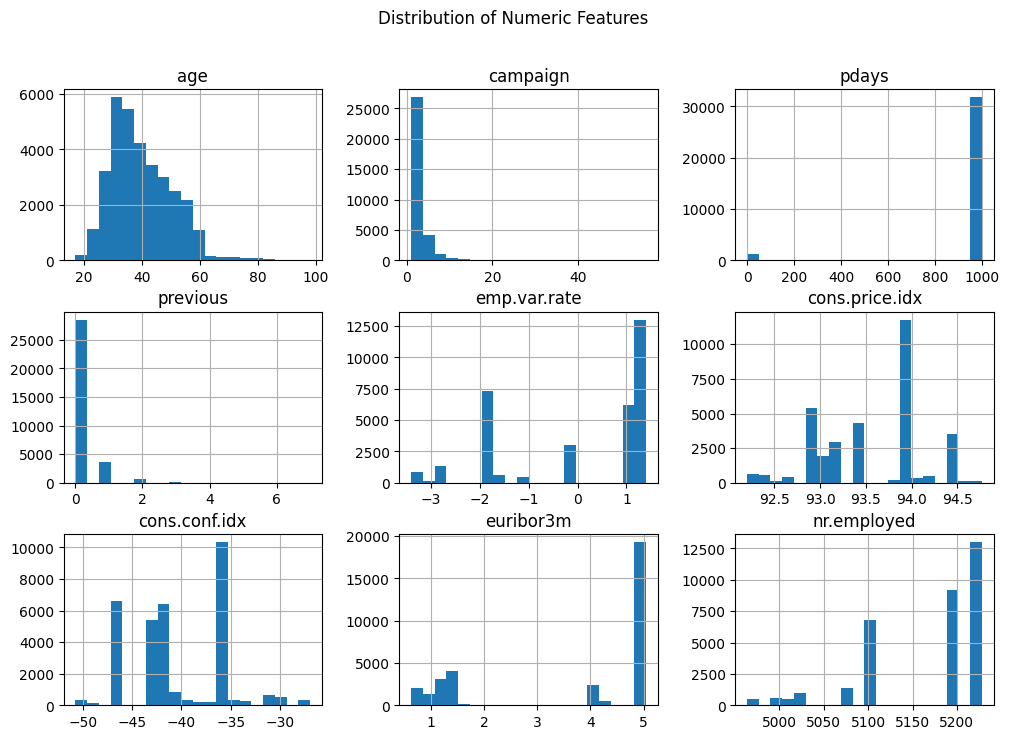

In [45]:
df[numeric_features].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Numeric Features")
plt.show()


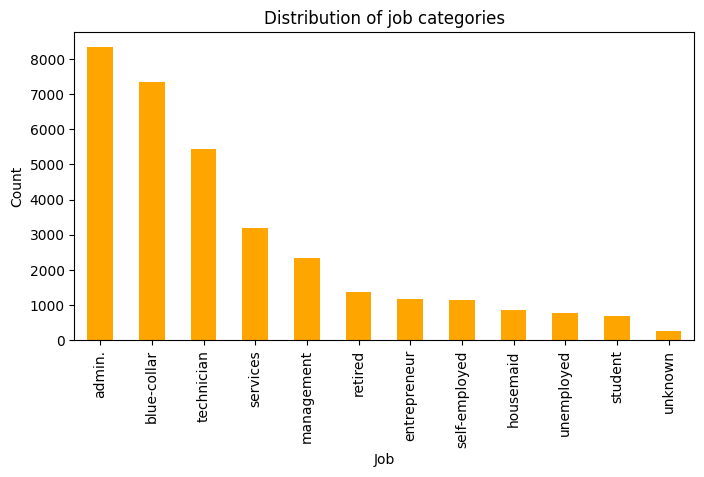

In [46]:
plt.figure(figsize=(8,4))
df['job'].value_counts().plot(kind='bar', color='orange')
plt.title("Distribution of job categories")
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()


In [47]:
df2 = df.copy()

numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    print(f"--- {col} ---")
    print(df[col].quantile([0, 0.25, 0.5, 0.75, 1]))
    print()

--- id ---
0.00        1.00
0.25    10272.25
0.50    20587.00
0.75    30854.75
1.00    41187.00
Name: id, dtype: float64

--- age ---
0.00    17.0
0.25    32.0
0.50    38.0
0.75    47.0
1.00    98.0
Name: age, dtype: float64

--- campaign ---
0.00     1.0
0.25     1.0
0.50     2.0
0.75     3.0
1.00    56.0
Name: campaign, dtype: float64

--- pdays ---
0.00      0.0
0.25    999.0
0.50    999.0
0.75    999.0
1.00    999.0
Name: pdays, dtype: float64

--- previous ---
0.00    0.0
0.25    0.0
0.50    0.0
0.75    0.0
1.00    7.0
Name: previous, dtype: float64

--- emp.var.rate ---
0.00   -3.4
0.25   -1.8
0.50    1.1
0.75    1.4
1.00    1.4
Name: emp.var.rate, dtype: float64

--- cons.price.idx ---
0.00    92.201
0.25    93.075
0.50    93.749
0.75    93.994
1.00    94.767
Name: cons.price.idx, dtype: float64

--- cons.conf.idx ---
0.00   -50.8
0.25   -42.7
0.50   -41.8
0.75   -36.4
1.00   -26.9
Name: cons.conf.idx, dtype: float64

--- euribor3m ---
0.00    0.634
0.25    1.344
0.50    4.857
0

In [48]:
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df2[(df2[col] < lower) | (df2[col] > upper)][col].count()

    print(f"{col}: 이상치 개수 = {outliers},  허용범위=({lower:.2f}, {upper:.2f})")


id: 이상치 개수 = 0,  허용범위=(-20601.50, 61728.50)
age: 이상치 개수 = 374,  허용범위=(9.50, 69.50)
campaign: 이상치 개수 = 1930,  허용범위=(-2.00, 6.00)
pdays: 이상치 개수 = 1215,  허용범위=(999.00, 999.00)
previous: 이상치 개수 = 4494,  허용범위=(0.00, 0.00)
emp.var.rate: 이상치 개수 = 0,  허용범위=(-6.60, 6.20)
cons.price.idx: 이상치 개수 = 0,  허용범위=(91.70, 95.37)
cons.conf.idx: 이상치 개수 = 364,  허용범위=(-52.15, -26.95)
euribor3m: 이상치 개수 = 0,  허용범위=(-4.08, 10.39)
nr.employed: 이상치 개수 = 0,  허용범위=(4905.60, 5421.60)


In [49]:
#campaign 변수 cap(상한선) 적용

q3 = df2['campaign'].quantile(0.75)   # 3
iqr = q3 - df2['campaign'].quantile(0.25)  # 2
upper = q3 + 1.5 * iqr  # 6

df2['campaign'] = df2['campaign'].clip(upper=upper)


In [50]:
df2['campaign'].max()
# 상한선 적용되었는지 확인

np.int64(6)

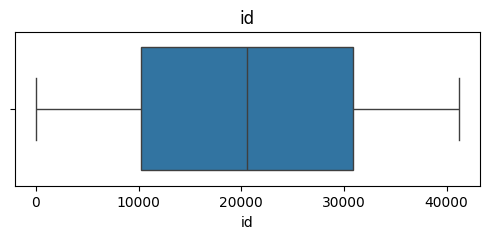

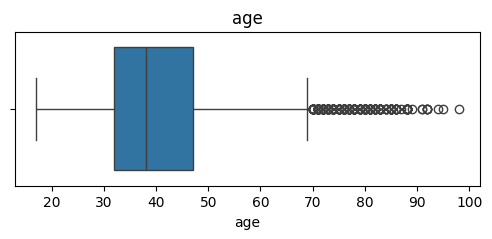

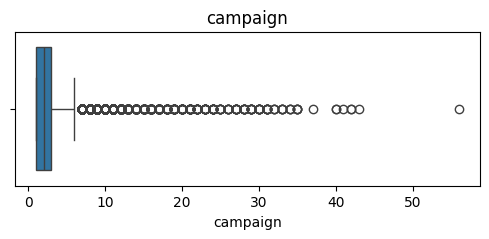

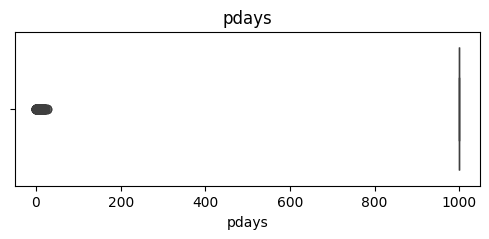

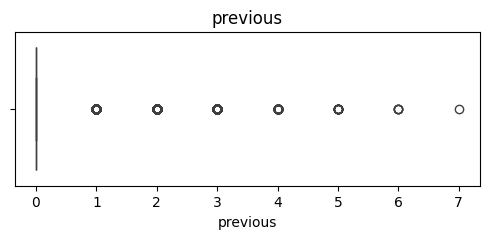

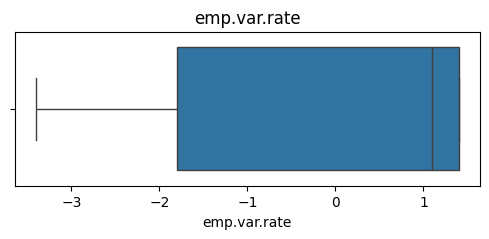

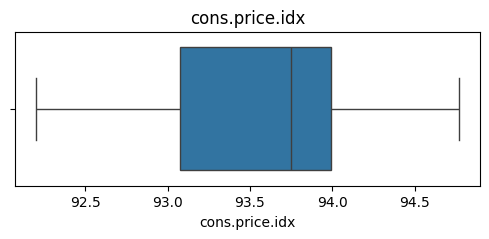

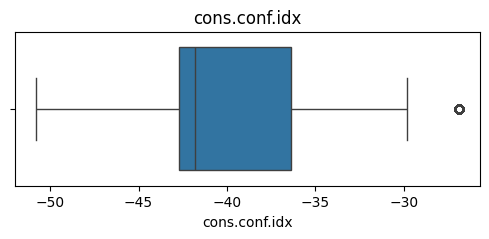

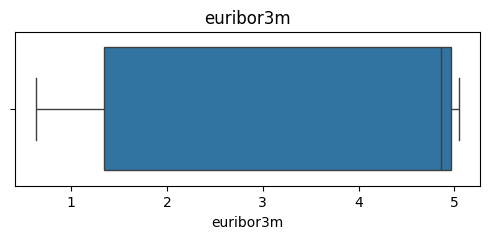

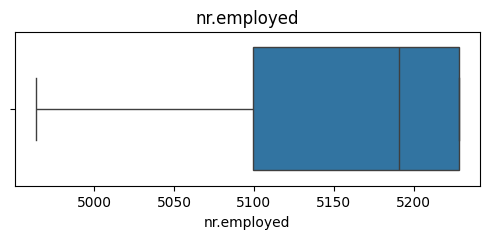

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [52]:
# 타깃 y를 0/1로 바꾸기
# 0 : 미가입 / 1 : 가입
import numpy as np

df3 = df2.copy()

# y: "yes"→1, "no"→0
df3['y'] = (df3['y'].astype(str).str.lower() == 'yes').astype(int)

X = df3.drop(columns=['y'])
y = df3['y']

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [54]:
#모델링


models = {
    'Softmax_Logistic': LogisticRegression(
        max_iter=2000,
        multi_class='multinomial',
        solver='lbfgs',
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    ),
    'RandomForest': RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=2,
    class_weight='balanced_subsample',
    n_jobs=-1,
    random_state=42
    ),
    'GradientBoostingClassifier': GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
    ),
   'MLP': MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        alpha=1e-4,
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42
    )

}

pipelines = {
    name: Pipeline(steps=[
        ('preprocess', preprocessor),   # 숫자 스케일링 + 범주형 원핫
        ('model', clf)
    ])
    for name, clf in models.items()
}

In [55]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, pipe in pipelines.items():
    # 각 fold에서 확률 예측
    y_prob_cv = cross_val_predict(
        pipe, X, y,
        cv=cv,
        method='predict_proba',
        n_jobs=-1
    )[:, 1]

    y_pred_cv = (y_prob_cv >= 0.5).astype(int)

    acc = accuracy_score(y, y_pred_cv)
    f1  = f1_score(y, y_pred_cv)
    auc = roc_auc_score(y, y_prob_cv)

    score = (acc + f1 + auc) / 3

    results[name] = {
        'ACC': acc,
        'F1': f1,
        'AUC': auc,
        'MeanScore': score
    }

results_df = pd.DataFrame(results).T
print(results_df.sort_values('MeanScore', ascending=False))


                                 ACC        F1       AUC  MeanScore
RandomForest                0.883065  0.486882  0.791306   0.720418
Softmax_Logistic            0.827496  0.451880  0.789099   0.689492
GradientBoostingClassifier  0.900303  0.368876  0.797451   0.688877
MLP                         0.896388  0.344973  0.786116   0.675826


In [56]:
best_model_name = results_df['MeanScore'].idxmax()
best_model_name

'RandomForest'

In [57]:
best_pipe = pipelines[best_model_name]

# 전체 train으로 다시 학습
best_pipe.fit(X, y)

# test 예측 (확률 + 0/1)
test_df = test_data.copy()
y_prob_test = best_pipe.predict_proba(test_df)[:, 1]
y_pred_test = (y_prob_test >= 0.5).astype(int)

# 제출 파일 생성
prediction = pd.DataFrame({
    'id': test_df['id'],
    'y_predict': y_pred_test,
    'y_prob': y_prob_test
})

prediction.to_csv('prediction.csv', index=False)
prediction.head()


,id,y_predict,y_prob
0,8626,0,0.234553
1,6749,0,0.028042
2,7227,0,0.119153
3,12558,0,0.150397
4,9628,0,0.059650


In [58]:
counts = prediction['y_predict'].value_counts()
print("미가입(0) 인원:", counts.get(0, 0))
print("가입(1) 인원:", counts.get(1, 0))
print("총 인원:", len(prediction))


미가입(0) 인원: 7258
가입(1) 인원: 980
총 인원: 8238


In [59]:
ratio = prediction['y_predict'].value_counts(normalize=True)
print("미가입(0) 비율:", ratio.get(0, 0))
print("가입(1) 비율:", ratio.get(1, 0))

미가입(0) 비율: 0.8810390871570769
가입(1) 비율: 0.11896091284292304


In [60]:
# 전처리 + 모델 결합한 최종 파이프라인
best_pipe = pipelines['RandomForest']

# 파이프라인 구성요소 추출
preprocessor = best_pipe.named_steps['preprocess']
model = best_pipe.named_steps['model']

# 전처리 이후의 전체 feature 이름 얻기
feature_names = preprocessor.get_feature_names_out()

import numpy as np
import pandas as pd

importances = model.feature_importances_

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

top5 = feat_imp.head(5)
top5



,feature,importance
7,num__euribor3m,0.139756
0,num__age,0.111119
8,num__nr.employed,0.079567
4,num__emp.var.rate,0.059517
1,num__campaign,0.056340


In [61]:
def raw_column_name(transformed_name):
    # transformed_name = "cat__job_admin." 또는 "num__age"
    return transformed_name.split("__")[1].split("_")[0]

top5['raw_column'] = top5['feature'].apply(raw_column_name)
top5


C:\Users\ryang\AppData\Local\Temp\ipykernel_17528\3519613574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['raw_column'] = top5['feature'].apply(raw_column_name)


,feature,importance,raw_column
7,num__euribor3m,0.139756,euribor3m
0,num__age,0.111119,age
8,num__nr.employed,0.079567,nr.employed
4,num__emp.var.rate,0.059517,emp.var.rate
1,num__campaign,0.056340,campaign


C:\Users\ryang\AppData\Local\Temp\ipykernel_17528\3122904924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


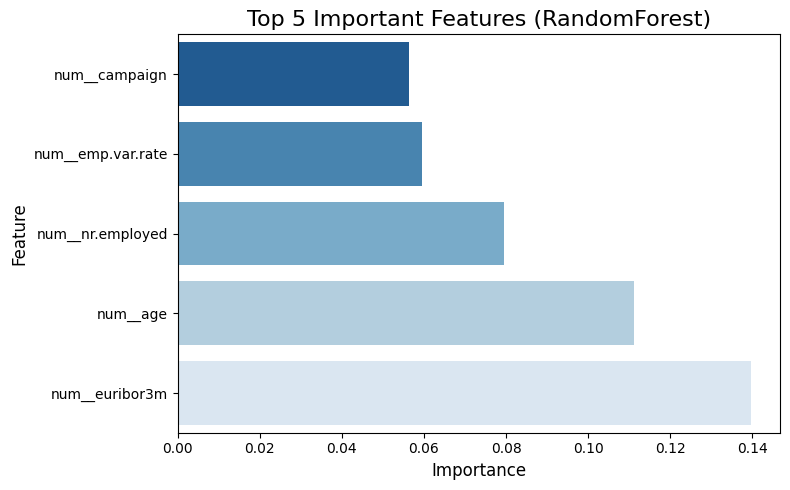

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 데이터
plot_df = top5.copy()
plot_df = plot_df.sort_values('importance', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_df,
    x='importance',
    y='feature',
    palette='Blues_r'
)

plt.title('Top 5 Important Features (RandomForest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()
